# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

* Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
credit_train=pd.read_csv('data/credit-train.csv')

In [3]:
credit_test=pd.read_csv('data/credit-test.csv')

In [4]:
credit_train.shape

(41188, 21)

In [5]:
credit_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
#ver que é index
credit_train.index

RangeIndex(start=0, stop=41188, step=1)

In [7]:
credit_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [8]:
#Pdays ten un problema nos datos, temos que sustituír o valor 999 por 0, no preprocessing 
#para evitar unha distorsión da distribución dos valores.
credit_train_mean_pdays = credit_train['pdays'].mean()
credit_train_mean_pdays

962.4754540157328

## 2.EDA y Visual EDA

In [9]:
credit_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [10]:
round(credit_train.describe())

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.0,3.0,962.0,0.0,0.0,94.0,-41.0,4.0,5167.0,0.0
std,10.0,259.0,3.0,187.0,0.0,2.0,1.0,5.0,2.0,72.0,0.0
min,17.0,0.0,1.0,0.0,0.0,-3.0,92.0,-51.0,1.0,4964.0,0.0
25%,32.0,102.0,1.0,999.0,0.0,-2.0,93.0,-43.0,1.0,5099.0,0.0
50%,38.0,180.0,2.0,999.0,0.0,1.0,94.0,-42.0,5.0,5191.0,0.0
75%,47.0,319.0,3.0,999.0,0.0,1.0,94.0,-36.0,5.0,5228.0,0.0
max,98.0,4918.0,56.0,999.0,7.0,1.0,95.0,-27.0,5.0,5228.0,1.0


In [11]:
credit_train[credit_train['y']==1].count()

age               4640
job               4640
marital           4640
education         4640
default           4640
housing           4640
loan              4640
contact           4640
month             4640
day_of_week       4640
duration          4640
campaign          4640
pdays             4640
previous          4640
poutcome          4640
emp_var_rate      4640
cons_price_idx    4640
cons_conf_idx     4640
euribor3m         4640
nr_employed       4640
y                 4640
dtype: int64

## Análise Visual
Despois de revisar os datos facemos unha mostra gráfica para tentar entender a correlación dos datos:

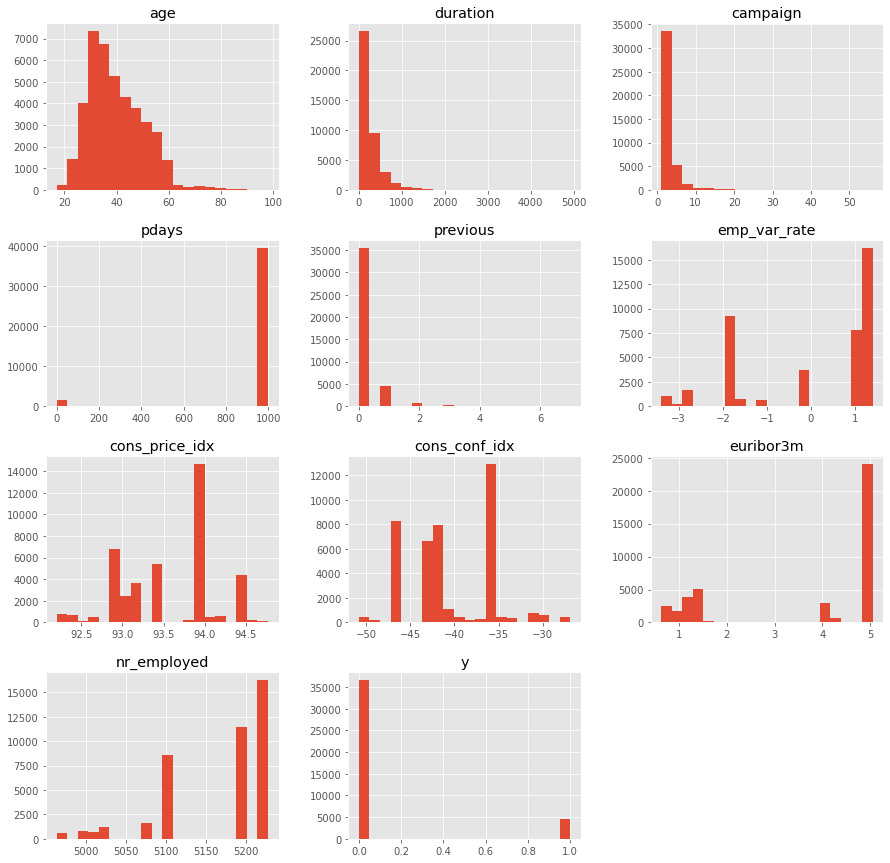

In [12]:
import matplotlib.pyplot as plt
credit_train.hist(bins=20,figsize=(15,15))
plt.show()

Pdays ten un problema nos datos, temos que sustituír o valor 999 por 0, para evitar unha distorsión da distribución dos valores.

## 3. Preprocessing data


In [13]:
credit_train = credit_train.drop(columns=['month', 'day_of_week'])

In [14]:
credit_train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## Imos aplicar LabelEncoder para transformar os categorias de string a integer
E aplicando o método ".classes_" mostramos a categoria que corresponde a cada número.

In [15]:
class_label_encoder = LabelEncoder()
credit_train['education']=class_label_encoder.fit_transform(credit_train['education'].values)
class_label_encoder.classes_

array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype=object)

In [16]:
credit_train['job']=class_label_encoder.fit_transform(credit_train['job'].values)
class_label_encoder.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [17]:
credit_train['marital']=class_label_encoder.fit_transform(credit_train['marital'].values)
class_label_encoder.classes_

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [18]:
credit_train['default']=class_label_encoder.fit_transform(credit_train['default'].values)
class_label_encoder.classes_

array(['no', 'unknown', 'yes'], dtype=object)

In [19]:
credit_train['housing']=class_label_encoder.fit_transform(credit_train['housing'].values)
class_label_encoder.classes_

array(['no', 'unknown', 'yes'], dtype=object)

In [20]:
credit_train['loan']=class_label_encoder.fit_transform(credit_train['loan'].values)
class_label_encoder.classes_

array(['no', 'unknown', 'yes'], dtype=object)

In [21]:
credit_train['contact']=class_label_encoder.fit_transform(credit_train['contact'].values)
class_label_encoder.classes_

array(['cellular', 'telephone'], dtype=object)

In [22]:
credit_train['poutcome']=class_label_encoder.fit_transform(credit_train['poutcome'].values)
class_label_encoder.classes_

array(['failure', 'nonexistent', 'success'], dtype=object)

## Temos o Dataset "limpo" de string e as categorias pasan todas a integer

In [23]:
credit_train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,210,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,339,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,1,0,2,1,222,1,999,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,0,1,0,0,1,196,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,2,6,1,2,2,1,62,3,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,5,0,0,2,1,200,2,999,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


## Agora Imos eliminar a distorsión en pdays, pasando o valor 999 ao que significa 0 contactos 

In [24]:
credit_train.loc[credit_train['pdays']==999, 'pdays']=0
credit_train['pdays'].unique()

array([ 0,  6,  3,  2,  4, 16,  5, 11, 14, 13,  9, 15, 17, 12, 26,  7, 19,
       10,  1, 18,  8, 20, 21, 22, 25, 27], dtype=int64)

In [25]:
credit_train['pdays'][credit_train['pdays']>0].count()

1500

In [26]:
credit_train['pdays'][credit_train['pdays']==0].count()

39688

# Imos ver a posible distorsion en duration, xa que 0 significa ningún contacto anterior

In [27]:
credit_train['duration'][credit_train['duration']==0].count()

4

# ...pois non distorsiona nada, só hai 4 rows de valor 0

In [28]:
credit_train.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,258.285010,2.567593,0.221229,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,259.279249,2.770014,1.348874,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,180.000000,2.000000,0.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,319.000000,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,4918.000000,56.000000,27.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [29]:
credit_train.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,258.285010,2.567593,0.221229,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,259.279249,2.770014,1.348874,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,180.000000,2.000000,0.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,319.000000,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,4918.000000,56.000000,27.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [30]:
credit_train[credit_train['y']==1].count()

age               4640
job               4640
marital           4640
education         4640
default           4640
housing           4640
loan              4640
contact           4640
duration          4640
campaign          4640
pdays             4640
previous          4640
poutcome          4640
emp_var_rate      4640
cons_price_idx    4640
cons_conf_idx     4640
euribor3m         4640
nr_employed       4640
y                 4640
dtype: int64

## 4. Creación del modelo y división del dataset


In [33]:
#Importación das librerías
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#división do dataset en X cos datos e y coa variable resposta
X = credit_train.drop('y', axis=1).values
y = credit_train['y'].values

In [34]:
#Asignación de variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [35]:
#Normalización de valores
scaler = MinMaxScaler()

In [36]:
#Entrenamento con fit
X_train = scaler.fit_transform(X_train)
#xa non se pode aplicar outro fit_transform sobre o X_test
X_test = scaler.transform(X_test)
X_test

array([[0.27160494, 0.36363636, 0.33333333, ..., 0.61506276, 0.98209023,
        1.        ],
       [0.17283951, 0.18181818, 0.33333333, ..., 0.37656904, 0.98231693,
        1.        ],
       [0.50617284, 0.27272727, 0.33333333, ..., 0.61506276, 0.98231693,
        1.        ],
       ...,
       [0.30864198, 0.36363636, 0.33333333, ..., 0.61506276, 0.98186352,
        1.        ],
       [0.2345679 , 0.81818182, 0.66666667, ..., 0.19246862, 0.15869417,
        0.51228733],
       [0.2962963 , 0.        , 0.33333333, ..., 0.61506276, 0.98141011,
        1.        ]])

## 5. Treinamento do modelo

In [37]:
#Creación do modelo para calcular as distancias euclideas entre X e y con 4 veciños
knn = KNeighborsClassifier(n_neighbors=4)

In [38]:
#Treinamento do modelo, que probaremos con 4 veciños
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


KNeighborsClassifier(n_jobs=1, n_neighbors=4)

## 6. Análisis de resultados

In [39]:
#Averiguamos a accuracy, que é o acerto nas prediccións.
print('Precisión do clasificador K-NN nos datos de treinamento: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('do clasificador K-NN nos datos de test: {:.2f}'
      .format(knn.score(X_test, y_test)))
#Accuracy test vai ser inferior á do training test

Precisión do clasificador K-NN nos datos de treinamento: 0.92
do clasificador K-NN nos datos de test: 0.89


In [40]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Métricas e Matriz de confusión

In [41]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[7191  119]
 [ 746  182]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.60      0.20      0.30       928

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



In [42]:
#Preparamos as matrices para ver a Exactitude (Accuracy) para veciños de 1 á 9
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

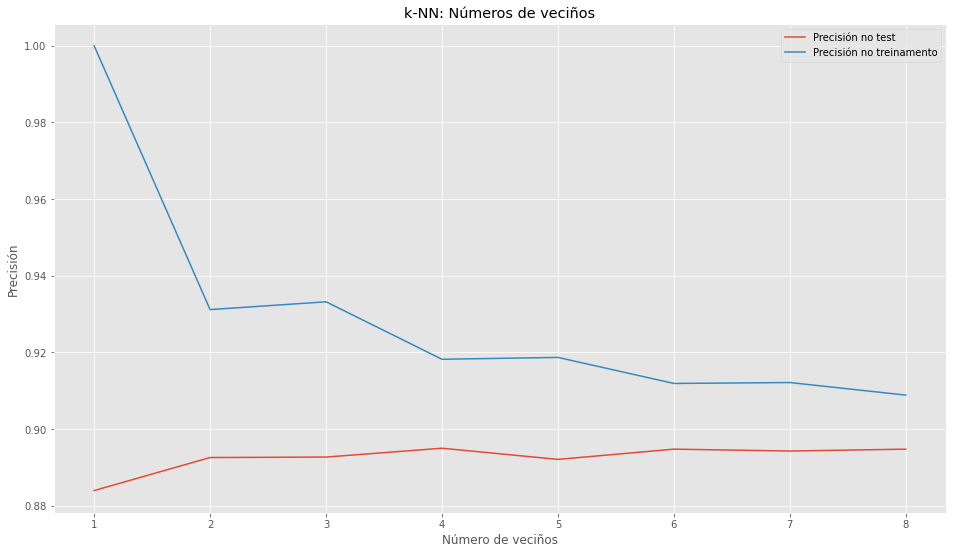

In [43]:
# Bucle para ver os valores de posibles de veciños 
for i, k in enumerate(neighbors):
    # Configuramos un clasificador k-NN con k veciños
    knn = KNeighborsClassifier(n_neighbors=k)
    # Treinamos o clasificador 
    knn.fit(X_train, y_train)
    #Precisión no treinamento
    train_accuracy[i] = knn.score(X_train, y_train)
    #Precisión no test
    test_accuracy[i] = knn.score(X_test, y_test)
# Xeneramos o gráfico
plt.title('k-NN: Números de veciños')
plt.plot(neighbors, test_accuracy, label = 'Precisión no test')
plt.plot(neighbors, train_accuracy, label = 'Precisión no treinamento')
plt.legend()
plt.xlabel('Número de veciños')
plt.ylabel('Precisión')
plt.show()

## 7. Realización de predicciones

In [44]:
credit_test = credit_test.drop(columns=['month', 'day_of_week'])

In [45]:
credit_test[['education','job','marital','default','housing','loan','contact','poutcome']]=credit_test[['education','job','marital','default','housing','loan','contact','poutcome']].apply(LabelEncoder().fit_transform)

In [46]:
credit_test.loc[credit_test['pdays']==999, 'pdays']=0
credit_test['pdays'].unique()

array([ 0, 12,  3,  6,  5,  2, 10, 11,  7,  1, 18,  4, 15, 16,  9, 19, 17,
       13, 21, 14], dtype=int64)

In [50]:
credit_test.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,3.824958,1.176985,3.780286,0.195436,1.081573,0.348386,0.356154,256.788055,2.537266,0.227725,0.190337,0.924253,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,3.606319,0.606341,2.149588,0.397196,0.983915,0.741647,0.478920,254.703736,2.568159,1.369053,0.541788,0.372816,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,103.000000,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,3.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,181.000000,2.000000,0.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,317.000000,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,3643.000000,35.000000,21.000000,6.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [51]:
credit_train.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,258.285010,2.567593,0.221229,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,259.279249,2.770014,1.348874,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,180.000000,2.000000,0.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,319.000000,3.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,4918.000000,56.000000,27.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [48]:
new_prediction = knn.predict(credit_test)
new_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
np = pd.DataFrame(new_prediction)
np[np[0]==1].count()

0    4034
dtype: int64

## 8. Visualización